In [53]:
from utils.RunConcatenateExperiment import RunConcatenateExperiment

from models.UrlsEmbedding import Clustering_algorithm, Scale

%matplotlib inline

In [54]:
direct = "/Volumes/AdditionalDriveMAC/Google Drive/1) Tesi/Sperimentazioni/"

site = "cs.ox.ac.uk" # cs.illinois.edu  cs.ox.ac.uk  cs.priceton.edu  cs.stanford.edu
type_site = "NoConstraint" # ListConstraint  NoConstraint

db_best_left_with_b = "1000000" # 100000 = 100K ; 500000 = 500K ; 1000000 = 1M
window_best_left_with_b = "2" # 2 3 5 7
depth_best_left_with_b = "20" # 10 15 20
iteractions_left_with_b = "3" # 50 10 3
                 
                 
db_best_normal = "1000000" # 100000 = 100K ; 500000 = 500K ; 1000000 = 1M
window_best_normal = "3" # 2 3 5 7
depth_best_normal = "20" # 10 15 20
iteractions_normal = "3" # 50 10 3
                 
clustering = Clustering_algorithm.HDBscan
intersect = True
                 
scaling = Scale.l2
separator = "\t"

In [55]:
%time e = RunConcatenateExperiment(direct, site, type_site, db_best_left_with_b, window_best_left_with_b, depth_best_left_with_b, iteractions_left_with_b, db_best_normal, window_best_normal, depth_best_normal, iteractions_normal, clustering, separator, scaling, intersect)

scaling embeddings with L2 normalization


scaling embeddings with L2 normalization


scaling embeddings with L2 normalization
Intersecting...
Original urls: 3479


Intersected urls: 3442
Original urls: 3443


Intersected urls: 3442
Concatenating...


Start running HDBscan


Start running HDBscan


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:193: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3442 but corresponding boolean dimension is 3250
  a = np.mean(distances_row[mask])


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:219: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3442 but corresponding boolean dimension is 3250
  for cur_label in set(labels) if not cur_label == label])


Homogeneity: 0.0686728660962
Completeness: 0.262146129436
V-Measure core: 0.108834899371
Adjusted Rand index: 0.06372096352931778
Mutual Information: 0.0652515112424
Silhouette: -0.0569531658211


Homogeneity: 0.552769348854
Completeness: 0.455746779133
V-Measure core: 0.499591118779
Adjusted Rand index: 0.15971213720311783
Mutual Information: 0.420355422869
Silhouette: -0.12601133861
CPU times: user 1min 21s, sys: 2.53 s, total: 1min 24s
Wall time: 2min 45s


In [60]:
print("Metrics WITH B VALUE")

e.get_dataframe_left_with_b_doc2vec()

Metrics WITH B VALUE


,Adj Mutual info,Adj Rand index,Completeness,Homogeneity,Silhouette,V-Measure
HDBScan,0.07,0.06,0.26,0.07,-0.06,0.11


In [61]:
print("Metrics NORMAL")

e.get_dataframe_normal_doc2vec()

Metrics NORMAL


,Adj Mutual info,Adj Rand index,Completeness,Homogeneity,Silhouette,V-Measure
HDBScan,0.42,0.16,0.46,0.55,-0.13,0.50


normal_doc2vec


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py'>

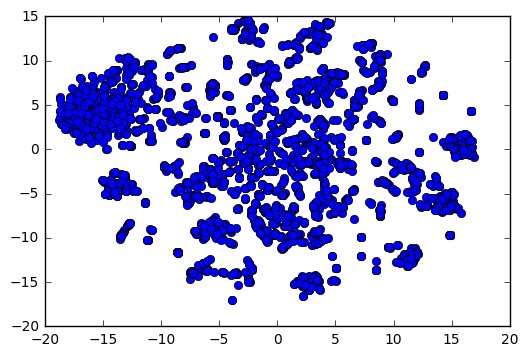

In [58]:
direct = direct + site + "/" + type_site + "/"

print("normal_doc2vec")

e.plot_normalized_normal_doc2vec(direct + "normal_doc2vec_" + clustering.value)

left_with_b_doc2vec


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py'>

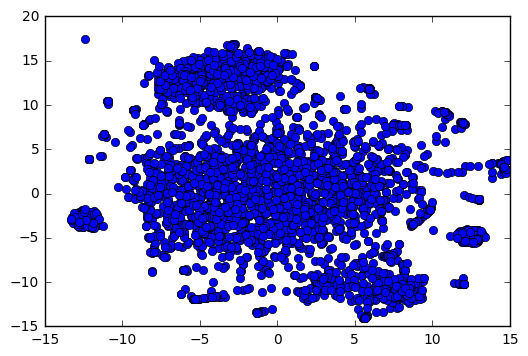

In [59]:
print("left_with_b_doc2vec")

e.plot_normalized_left_with_b_doc2vec(direct + "left_with_b_doc2vec_" + clustering.value)